In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn import tree

In [23]:
#run
df = pd.read_csv("/content/football_players_dataset.csv")

#df.head()

EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


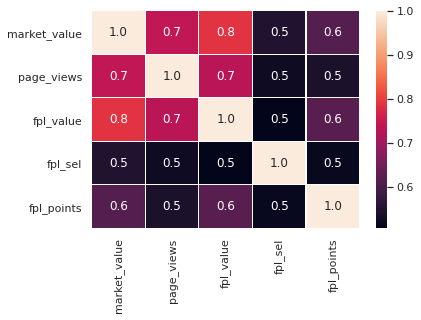

In [24]:
df.shape
df.info()
#from above table:There are 3 float, 9 int and 5 categorical variables. region has one missing value.
df.corr()
##age,age_cat are correlated so drop age
df['region'] = df['region'].astype('object')
df['position_cat']= df['position_cat'].astype('object')
df['new_foreign'] = df['new_foreign'].astype('object')
df['age_cat']= df['age_cat'].astype('object')
df['club_id'] = df['club_id'].astype('object')
df['big_club']= df['big_club'].astype('object')
df['new_signing'] = df['new_signing'].astype('object')
df['fpl_sel'] = df['fpl_sel'].apply(lambda x: float(x[:-1])/100)


df1 = df.dropna()
df1.shape

df1.describe()

df1.corr()['market_value'].sort_values()
#from above, we can see market value is correlated with fpl_value,page_views,fpl_points,big_club.
#name: drop
#club: drop
#age: drop
#position: drop
#position_cat: 1,2,3,4 no need to dummy as already in numerical form
#market_value: numerical
#page_view:numerical
#fpl_value:numerical
#fpl_sel:numerical
#fpl_points:numerical
#region:1,2,3,4 no dummy
#nationality: categorical dummy
#new_foreign:0,1
#age_cat:1,2,3,4,5,6 no dummy
#club_id:1,2,,,,.....20 no dummy
#big_club:0,1
#new_signing:0,1

df1_drop = df1.drop(['name','club','age','position'],axis=1)
df1_drop.head()

encoded = pd.get_dummies(df1_drop, columns=['nationality'],drop_first=True)
encoded.head()
encoded.shape

import seaborn as sns
sns.set()

cor1=df1_drop.corr()
sns.heatmap(cor1, mask=np.zeros_like(cor1, dtype=np.bool),annot=True,fmt='.1f',linewidth=.1)

#sns.distplot(df1_drop['market_value'])

#sns.pairplot(df1_drop,height=2.5)

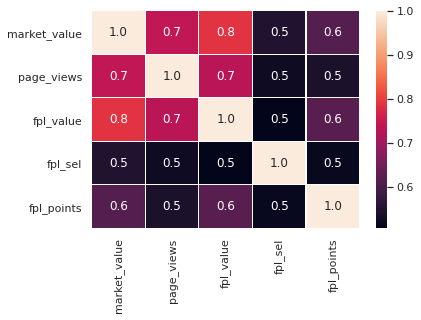

In [13]:
sns.heatmap(cor1, mask=np.zeros_like(cor1, dtype=np.bool),annot=True,fmt='.1f',linewidth=.1)


In [25]:
df1_drop = df1.drop(['name','club','age','position'],axis=1)
df1_drop.head()

encoded = pd.get_dummies(df1_drop, columns=['nationality'],drop_first=True)
encoded.head()
encoded.shape

(460, 71)

In [26]:
encoded.head()

,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing,nationality_Argentina,nationality_Armenia,nationality_Australia,nationality_Austria,nationality_Belgium,nationality_Bermuda,nationality_Bosnia,nationality_Brazil,nationality_Cameroon,nationality_Canada,nationality_Chile,nationality_Colombia,nationality_Congo DR,nationality_Cote d'Ivoire,nationality_Croatia,nationality_Curacao,nationality_Czech Republic,nationality_Denmark,nationality_Ecuador,nationality_Egypt,nationality_England,nationality_Estonia,nationality_Finland,nationality_France,nationality_Germany,nationality_Ghana,nationality_Greece,nationality_Iceland,nationality_Ireland,nationality_Israel,nationality_Italy,nationality_Jamaica,nationality_Japan,nationality_Kenya,nationality_Mali,nationality_Morocco,nationality_Netherlands,nationality_New Zealand,nationality_Nigeria,nationality_Northern Ireland,nationality_Norway,nationality_Poland,nationality_Portugal,nationality_Romania,nationality_Scotland,nationality_Senegal,nationality_Serbia,nationality_Slovenia,nationality_South Korea,nationality_Spain,nationality_Sweden,nationality_Switzerland,nationality_The Gambia,nationality_Trinidad and Tobago,nationality_Tunisia,nationality_United States,nationality_Uruguay,nationality_Venezuela,nationality_Wales
0,1,65.0,4329,12.0,0.171,264,3,0,4,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,50.0,4395,9.5,0.056,167,2,0,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,7.0,1529,5.5,0.059,134,2,0,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,20.0,2393,7.5,0.015,122,1,0,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,22.0,912,6.0,0.007,121,2,0,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
Y_drop=encoded['market_value']
X_drop=encoded.drop(['market_value'],axis=1)
list(X_drop)

['position_cat',
 'page_views',
 'fpl_value',
 'fpl_sel',
 'fpl_points',
 'region',
 'new_foreign',
 'age_cat',
 'club_id',
 'big_club',
 'new_signing',
 'nationality_Argentina',
 'nationality_Armenia',
 'nationality_Australia',
 'nationality_Austria',
 'nationality_Belgium',
 'nationality_Bermuda',
 'nationality_Bosnia',
 'nationality_Brazil',
 'nationality_Cameroon',
 'nationality_Canada',
 'nationality_Chile',
 'nationality_Colombia',
 'nationality_Congo DR',
 "nationality_Cote d'Ivoire",
 'nationality_Croatia',
 'nationality_Curacao',
 'nationality_Czech Republic',
 'nationality_Denmark',
 'nationality_Ecuador',
 'nationality_Egypt',
 'nationality_England',
 'nationality_Estonia',
 'nationality_Finland',
 'nationality_France',
 'nationality_Germany',
 'nationality_Ghana',
 'nationality_Greece',
 'nationality_Iceland',
 'nationality_Ireland',
 'nationality_Israel',
 'nationality_Italy',
 'nationality_Jamaica',
 'nationality_Japan',
 'nationality_Kenya',
 'nationality_Mali',
 'nation

In [28]:

#Y_drop=encoded['market_value']
#X_drop=encoded.drop(['market_value'],axis=1)

#X_drop.head()
from sklearn.model_selection import train_test_split
x_train_drop,x_test_drop,y_train_drop,y_test_drop=train_test_split(X_drop,Y_drop,test_size=0.2)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()
S_train_x_drop=scaler1.fit_transform(x_train_drop)
S_test_x_drop=scaler1.transform(x_test_drop)

Linear regression

In [11]:
#run
##with nationality as dummy
import statsmodels.api as sm
from scipy import stats


X2=sm.add_constant(S_train_x_drop)
est = sm.OLS(y_train_drop,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           market_value   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     18.13
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           5.39e-73
Time:                        17:08:46   Log-Likelihood:                -1125.1
No. Observations:                 368   AIC:                             2384.
Df Residuals:                     301   BIC:                             2646.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.4904      7.894      2.216      0.0

significant var: x3,x4,x5,x8,x10,
in nationality:x15,x32,x38,x40,x42,x48,x51,x52,x53,x54,x56,x70

Ridge

In [56]:
X2=sm.add_constant(S_train_x_drop)
est = sm.OLS(y_train_drop,X2)
est2_ridge = est.fit_regularized(alpha=0.1,L1_wt=0) #0 is Ridge
print(est2_ridge.params)

[ 3.68086684e+00 -2.49455674e+00  5.86158163e+00  8.06980384e+00
  5.08910251e+00  8.05606013e+00  1.50750874e+00  1.35923586e+00
 -4.86585370e-02  9.74486040e-01  8.75046710e+00  1.09638320e+00
  5.47739516e-01  1.97663629e-15 -1.64194862e-01 -2.47328696e-01
  2.12071730e+00 -3.28204636e-02  2.14245408e-15  6.99946842e-01
 -1.53697282e-02 -1.13160315e-01  5.72380558e-01 -1.41886389e-01
 -1.19681613e-01 -7.90972325e-02 -1.92380384e-03  4.27566658e-16
 -3.77384865e-01  2.40774892e-01 -2.73890931e-01 -7.34580074e-02
 -5.00561541e-01 -3.12337634e-01 -4.90963995e-02  1.92651885e+00
  3.19717278e-01  8.68622208e-02  8.25250765e-17 -1.44084065e-01
 -1.78023965e-01 -2.00389921e-01 -2.04754867e-03 -2.32057474e-01
 -6.71001323e-02  1.25121668e-01  2.94928132e-16 -6.45431873e-03
 -2.09390232e-01  3.06444989e-02 -3.61994163e-01 -4.30860714e-01
 -1.87869817e-01 -2.29000330e-01 -9.78203498e-02 -9.49570162e-17
 -7.74654403e-01  4.85159737e-01  2.16512772e-01 -6.84018230e-02
 -4.45322216e-02  1.58422

Lasso

In [57]:
est2_lasso = est.fit_regularized(alpha=0.1,L1_wt=1) #1 is Lasso
print(est2_lasso.params)

const     0.000000
x1        0.000000
x2       17.783151
x3       28.319215
x4        6.500139
           ...    
x66       0.000000
x67       0.000000
x68       0.000000
x69       0.000000
x70       0.000000
Length: 71, dtype: float64


Linear regression using sklearn

In [58]:
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
reg = linear_model.LinearRegression()
reg.fit(S_train_x_drop,y_train_drop)
coefficients = reg.coef_

predictors = [i for i, item in list(enumerate(coefficients.squeeze())) if abs(item) > 0]

print('Coefficients:', coefficients)
print('Intercept:', reg.intercept_)
print('Predictors with non-zero coefficients:', predictors)

print ('Regression: R^2 score on training set', reg.score(S_train_x_drop,y_train_drop))
print ('Regression: R^2 score on test set', reg.score(S_test_x_drop,y_test_drop))


Coefficients: [ 2.46075134e+00  2.38321973e+01  2.73238192e+01  8.09585333e+00
  1.46559064e+01 -7.14701377e+00  5.53806092e+00 -3.63985484e+00
  2.07234211e-01  5.28852586e+00 -3.47372232e-01 -6.32232320e+00
 -3.93038296e+11 -6.32167162e+00 -1.32634702e+01 -7.00283394e+00
 -5.78066015e+00  1.12879716e+12 -8.98311462e+00 -6.54428463e+00
 -1.17327871e+01 -8.19264504e+00 -1.16783753e+01 -6.57412761e+00
 -1.21296420e+01 -1.14599645e+01 -5.04710500e+11 -1.84028985e+01
 -1.15839167e+01 -2.37728722e+01 -7.00907334e+00 -1.53429664e+01
 -1.82307319e+01 -1.05157776e+01 -7.18360901e+00 -1.08721924e+01
 -5.43161011e+00 -2.28551723e+08 -1.25686569e+01 -1.15007935e+01
 -5.18174744e+00 -9.23659515e+00 -1.03113861e+01 -7.03218842e+00
  2.14929199e+00 -7.98401807e+03 -3.60972595e+00 -1.11555023e+01
 -5.34799194e+00 -1.01333008e+01 -1.33605957e+01 -2.74057322e+01
 -1.65663052e+01 -1.14472046e+01 -2.65502930e-03 -1.37670898e+01
 -2.70001221e+00 -7.59921265e+00 -1.21407471e+01 -6.59771347e+00
 -1.0086608

In [59]:
y_pred = reg.predict(S_test_x_drop)
print("r2 error",r2_score(y_test_drop,y_pred))
print("MAE:",mean_absolute_error(y_test_drop,y_pred))
print("MSE",mean_squared_error(y_test_drop,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test_drop,y_pred)))

r2 error -3.443436505559017e+20
MAE: 34299692255.411774
MSE 3.2147585951146734e+22
RMSE 179297478931.37463


Lasso and ridge using sklearn

In [60]:
from sklearn.linear_model import Lasso as Lasso_Reg
reg = Lasso_Reg(alpha = 0.01)
reg.fit(S_train_x_drop,y_train_drop)
coefficients = reg.coef_

print('Lasso:')
print('Coefficients:', coefficients)
print('Intercept:', reg.intercept_)
print('Predictors with non-zero coefficients:', [i for i, item in enumerate(coefficients) if abs(item) > 0])

print ('Lasso Regression: R^2 score on training set', reg.score(S_train_x_drop,y_train_drop))
print ('Lasso Regression: R^2 score on test set', reg.score(S_test_x_drop,y_test_drop))

Lasso:
Coefficients: [  1.8298932   23.49755944  27.51422825   7.66027299  14.19837963
   0.437039     4.92554037  -3.4545599    0.27209818   5.40553726
   0.           2.2885304    0.           0.          -0.58440101
   3.89367939   0.           0.          -0.           0.07740845
  -0.           0.          -0.          -0.          -4.6213705
  -0.           0.          -5.1936981   -0.         -11.0870613
  -0.          -1.51868198  -3.5429132    0.           3.85249437
   0.13663776   0.           0.          -0.          -0.
   0.           0.          -0.          -0.           4.35373087
   0.           0.36264265   0.           0.          -3.34867971
  -1.38235179 -12.32401534  -3.4432598   -0.           0.
  -2.2198397    2.57291398   2.91090394  -0.          -0.
   1.14803118   0.           4.55657638  -0.          -0.
  -0.          -0.           0.           0.          -0.6919814 ]
Intercept: -0.7892818989889623
Predictors with non-zero coefficients: [0, 1, 2, 3, 4, 5,

In [25]:
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn import metrics
# Ridge regression: Fit and evaluate 
reg = Ridge_Reg(alpha = 0.1)
reg.fit(S_train_x_drop,y_train_drop)
coefficients = reg.coef_

predictors = [i for i, item in list(enumerate(coefficients.squeeze())) if abs(item) > 0]

print ('Ridge:')
print ('Coefficients:', coefficients)
print ('Selected predictors:',predictors)
print ('Ridge Regression: R^2 score on training set', reg.score(S_train_x_drop,y_train_drop))
print ('Ridge Regression: R^2 score on test set', reg.score(S_test_x_drop,y_test_drop))


Ridge:
Coefficients: [ 8.14090046e-01  7.07500822e+00  2.55279342e+01  1.17328855e+01
  1.52251287e+01 -9.00861544e-01  2.98286018e+00 -4.64627928e+00
 -6.66990176e-02  6.23391182e+00  1.20538949e+00 -1.60039549e+00
  6.13898758e+00 -1.24476077e+00 -4.26442961e+00  6.92487481e-01
  1.67677271e-01 -2.27881302e+00 -1.04865741e+00 -8.17458514e-01
 -4.59241733e+00  1.42115094e+00 -3.84264937e+00  1.02569171e+00
 -3.73896308e+00 -2.00861588e+00  0.00000000e+00 -3.03059328e+00
 -1.79133953e+00 -1.01650654e+00 -3.28259347e-01 -4.22869967e+00
  0.00000000e+00 -1.05331114e+00  7.81461711e-01 -7.50247688e-01
 -1.07591896e+00 -6.24802576e+00 -3.69710765e+00 -2.52615118e+00
 -9.53012039e-01 -2.30191760e+00 -3.52510779e+00 -2.02932182e+00
  4.91672999e+00  1.78269965e-01  2.57768182e+00 -2.12527324e+00
  7.00337398e-03 -4.29505157e+00 -4.79082729e+00 -1.68927241e+01
 -6.39904428e+00 -5.24301465e+00 -4.33708836e-01 -4.67889788e+00
  2.51956582e+00  3.40203473e+00 -3.64938090e+00 -9.60663953e-01
  1.

Final variables and dat after linear regression



In [29]:
final= df1_drop[['market_value','fpl_value','fpl_sel','fpl_points','age_cat','big_club']]

Y_final=final['market_value']
X_final=final.drop(['market_value'],axis=1)

#X_drop.head()
from sklearn.model_selection import train_test_split
x_train_final,x_test_final,y_train_final,y_test_final=train_test_split(X_final,Y_final,test_size=0.2)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()
S_train_x_final=scaler1.fit_transform(x_train_final)
S_test_x_final=scaler1.transform(x_test_final)

Support vector regression

In [62]:
from sklearn.svm import SVR
from sklearn import metrics
regr = SVR(C=100.0, epsilon=0.01,kernel='poly',degree=3)
regr.fit(S_train_x_final,y_train_final)
y_pred = regr.predict(S_test_x_final)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_final, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_final, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_final, y_pred)))

print (' R^2 score on training set', regr.score(S_train_x_final,y_train_final))
print (' R^2 score on test set', regr.score(S_test_x_final,y_test_final))


Mean Absolute Error: 4.138116680820287
Mean Squared Error: 36.369740743792924
Root Mean Squared Error: 6.030733018779137
 R^2 score on training set 0.7790593283246645
 R^2 score on test set 0.7949132044204367


Nearest neighbour

In [63]:
from sklearn.neighbors import KNeighborsRegressor
regr = KNeighborsRegressor(n_neighbors=2)
regr.fit(S_train_x_final,y_train_final)
y_pred = regr.predict(S_test_x_final)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_final, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_final, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_final, y_pred)))

print (' R^2 score on training set', regr.score(S_train_x_final,y_train_final))
print (' R^2 score on test set', regr.score(S_test_x_final,y_test_final))

Mean Absolute Error: 4.736141304347826
Mean Squared Error: 54.79171875
Root Mean Squared Error: 7.40214284852704
 R^2 score on training set 0.8962231736613049
 R^2 score on test set 0.691032770843934


Decision tree

In [64]:
##decision tree
dec_tree_reg = DecisionTreeRegressor(max_depth=6,criterion='mse')
dec_tree_reg.fit(S_train_x_final, y_train_final)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [65]:
y_pred=dec_tree_reg.predict(S_test_x_final)
#y_pred

In [31]:
#mse=mean_squared_error(S_test_x_drop,y_pred)
#rmse=np.sqrt(mse)
#print(rmse)
print("r2 training error",dec_tree_reg.score(S_train_x_final, y_train_final))
print("r2 testing error",dec_tree_reg.score(S_test_x_final, y_test_final))
print("r2 test set error",r2_score(y_test_final,y_pred))
print("MAE:",mean_absolute_error(y_test_final,y_pred))
print("MSE",mean_squared_error(y_test_final,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test_final,y_pred)))

r2 training error 0.8976509154539732
r2 testing error 0.7572223440285285
r2 test set error 0.7572223440285285
MAE: 4.481867662740536
MSE 54.278174005499444
RMSE 7.367372259191159


Hyperparameter tuning for decision tree

In [31]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [33]:
from sklearn.decomposition import PCA
Y_final=final['market_value']
X_final=final.drop(['market_value'],axis=1)


std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeRegressor()
pipe = Pipeline(steps=[('std_slc', std_slc),
                           
                           ('dec_tree', dec_tree)])
n_components = list(range(1,X_final.shape[1]+1,1))
criterion = ['mse','mae']
max_depth = [2,4,6,8,10,12]
parameters = dict(dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_final, Y_final)
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
#print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])


Best Criterion: mse
Best max_depth: 6

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


Random forest regression

In [47]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(S_train_x_final, y_train_final)   

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [67]:
Y_pred = regressor.predict(S_test_x_final)

In [68]:
print("r2 training score",regressor.score(S_train_x_final, y_train_final))
print("r2 testing score",regressor.score(S_test_x_final, y_test_final))
#print("r2 test set error",r2_score(y_test_drop,y_pred))
#print("r2 training error",r2_score(S_train_x_drop, y_train_drop)) 
print("r2 test error",r2_score(y_test_final,Y_pred))
print("MAE:",mean_absolute_error(y_test_final,Y_pred))
print("MSE",mean_squared_error(y_test_final,Y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test_final,Y_pred)))

r2 training score 0.8902150980381324
r2 testing score 0.9090969853904645
r2 test error 0.9090969853904645
MAE: 2.441698951863354
MSE 16.120584774047142
RMSE 4.015044803491879


In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, S_train_x_final.shape[1]),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],"n_estimators": sp_randint(100, 500)}
random_search = RandomizedSearchCV(regressor, param_distributions=param_dist,
                                   n_iter=10, cv=5, random_state=42)
random_search.fit(S_train_x_final, y_train_final)
print(random_search.best_params_)     
y_preds = random_search.predict(S_test_x_final)
print(r2_score(y_test_final, y_preds))         

{'bootstrap': True, 'max_depth': None, 'max_features': 1, 'min_samples_split': 9, 'n_estimators': 288}
0.8054163517864282


Gradient boost

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
regr = GradientBoostingRegressor()
regr.fit(S_train_x_final, y_train_final)
y_pred = regr.predict(S_test_x_final)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_final, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_final, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_final, y_pred)))
print (' R^2 score on training set', regr.score(S_train_x_final,y_train_final))
print (' R^2 score on test set', regr.score(S_test_x_final,y_test_final))

Mean Absolute Error: 3.658715819617931
Mean Squared Error: 30.78265998839691
Root Mean Squared Error: 5.548212323658578
 R^2 score on training set 0.9390636911818224
 R^2 score on test set 0.687493557058033


In [37]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.005,0.001], 'n_estimators':[100,500,1000,1500,1750],'max_depth':[2,3,4,5,6,7]}

tuning = GridSearchCV(estimator =GradientBoostingRegressor(min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3,n_jobs=4,iid=False, cv=5)
tuning.fit(S_train_x_final, y_train_final)
tuning.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


AttributeError: ignored

In [39]:
y_pred = tuning.predict(S_test_x_final)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_final, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_final, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_final, y_pred)))
print (' R^2 score on training set', tuning.score(S_train_x_final,y_train_final))
print (' R^2 score on test set', tuning.score(S_test_x_final,y_test_final))

Mean Absolute Error: 3.619934367282681
Mean Squared Error: 29.00886460366537
Root Mean Squared Error: 5.385987802034588
 R^2 score on training set 0.9253300198842197
 R^2 score on test set 0.705501178439625


In [38]:
tuning.best_params_

{'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 1750}